In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading Data**

In [76]:
iris=pd.read_csv("/content/iris.csv")

In [77]:

iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Analyze and visualize the dataset:**


In [78]:
iris.shape

(150, 5)

In [79]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

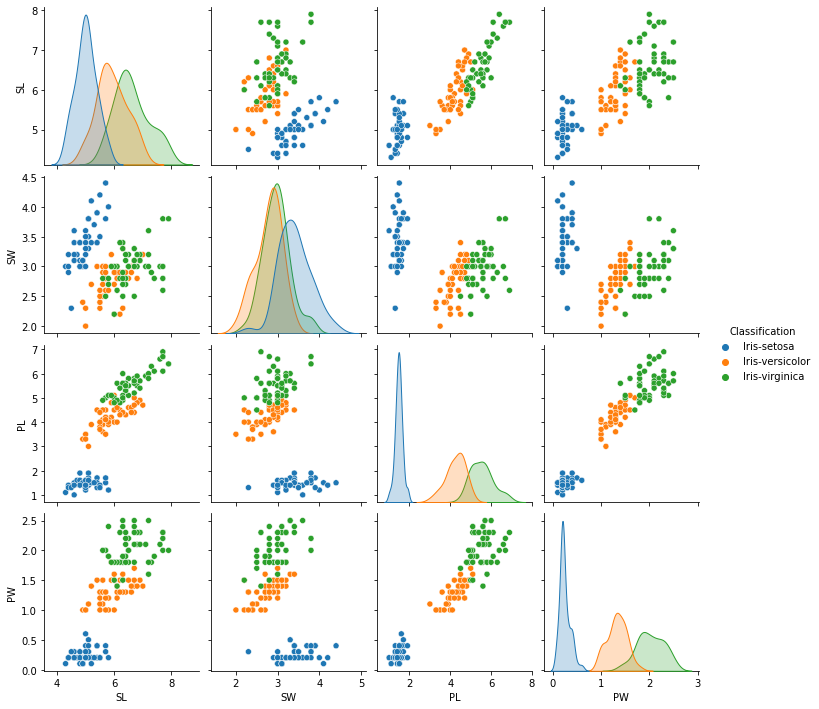

In [81]:
sns.pairplot(iris,hue="Classification")

**Preprocessing Data**

Finding NullValues and Filling Null Values

In [82]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

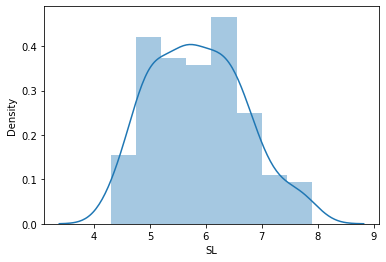

In [84]:
sns.distplot(iris["SL"])

since follow normal distibution using mean to fill


In [85]:
SL_mean=iris["SL"].mean()



In [86]:
iris["SL"]=iris["SL"].fillna(SL_mean)


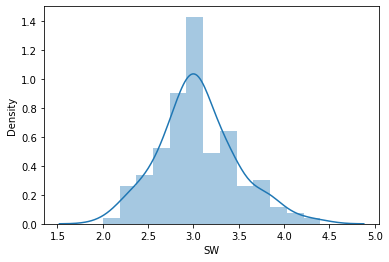

In [87]:

sns.distplot(iris["SW"])

here skewed using median to fill

In [88]:
SW_median=iris["SW"].median()

In [89]:
iris["SW"]=iris["SW"].fillna(SW_median)

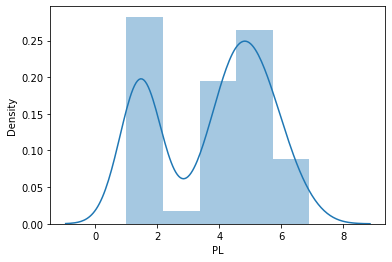

In [90]:
sns.distplot(iris["PL"])

here skewed using median to fill

In [91]:
PL_median=iris["PL"].median()

In [92]:
iris["PL"]=iris["PL"].fillna(PL_median)

In [93]:

iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [94]:
iris["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Since the dataset given is having less data removing outlier can lead to loss of imortant data so oultier is not removed

**Model training**

In [95]:
x=iris[[ 'SL', 'SW', 'PL', 'PW']]

In [96]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40,0.2
1,4.900000,3.0,1.40,0.2
2,5.855944,3.2,1.30,0.2
3,4.600000,3.1,1.50,0.2
4,5.000000,3.6,1.40,0.2
...,...,...,...,...
145,6.700000,3.0,5.20,2.3
146,6.300000,2.5,5.00,1.9
147,6.500000,3.0,4.35,2.0
148,6.200000,3.4,5.40,2.3


In [97]:
y=iris[['Classification']]

In [98]:
y

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [99]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [100]:

x_train.describe()

,SL,SW,PL,PW
count,120.000000,120.000000,120.000000,120.000000
mean,5.833631,3.049167,3.757083,1.182500
std,0.805720,0.432308,1.708755,0.753442
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.325000,3.300000,5.025000,1.800000
max,7.700000,4.400000,6.700000,2.500000


In [101]:
x_train.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [102]:

num_columns=['SL', 'SW', 'PL', 'PW']

For getting better optimization scaling technique is used

In [103]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train.loc[:,num_columns]=mms.fit_transform(x_train[num_columns])
x_test.loc[:,num_columns]=mms.fit_transform(x_test[num_columns])

In [104]:
x_train.describe()

,SL,SW,PL,PW
count,120.000000,120.000000,120.000000,120.000000
mean,0.451068,0.437153,0.483699,0.451042
std,0.236977,0.180128,0.299782,0.313934
min,0.000000,0.000000,0.000000,0.000000
25%,0.257353,0.333333,0.105263,0.083333
50%,0.441176,0.416667,0.587719,0.500000
75%,0.595588,0.541667,0.706140,0.708333
max,1.000000,1.000000,1.000000,1.000000


**Model Evaluation**

**LogisticRegression**

In [105]:

from sklearn.linear_model import LogisticRegression
from sklearn .metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


**KNeighborsClassifier**

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
  

1.0


**DecisionTreeClassifier**

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9333333333333333


**RandomForestClassifier**

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


**SVC**

In [109]:
from sklearn.svm import SVC
svn=SVC()
svn.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [ ]:
All the methods are giving good predictions ,but in the selected random size KNeighborsClassifier and RandomForestClassifier are giving better compared to other methods